# Fazendo mapinhas

In [78]:
import geopandas as gp
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [61]:
shape_file = gp.read_file('gis-dataset-brasil/municipio/shapefile/Munic.shp')

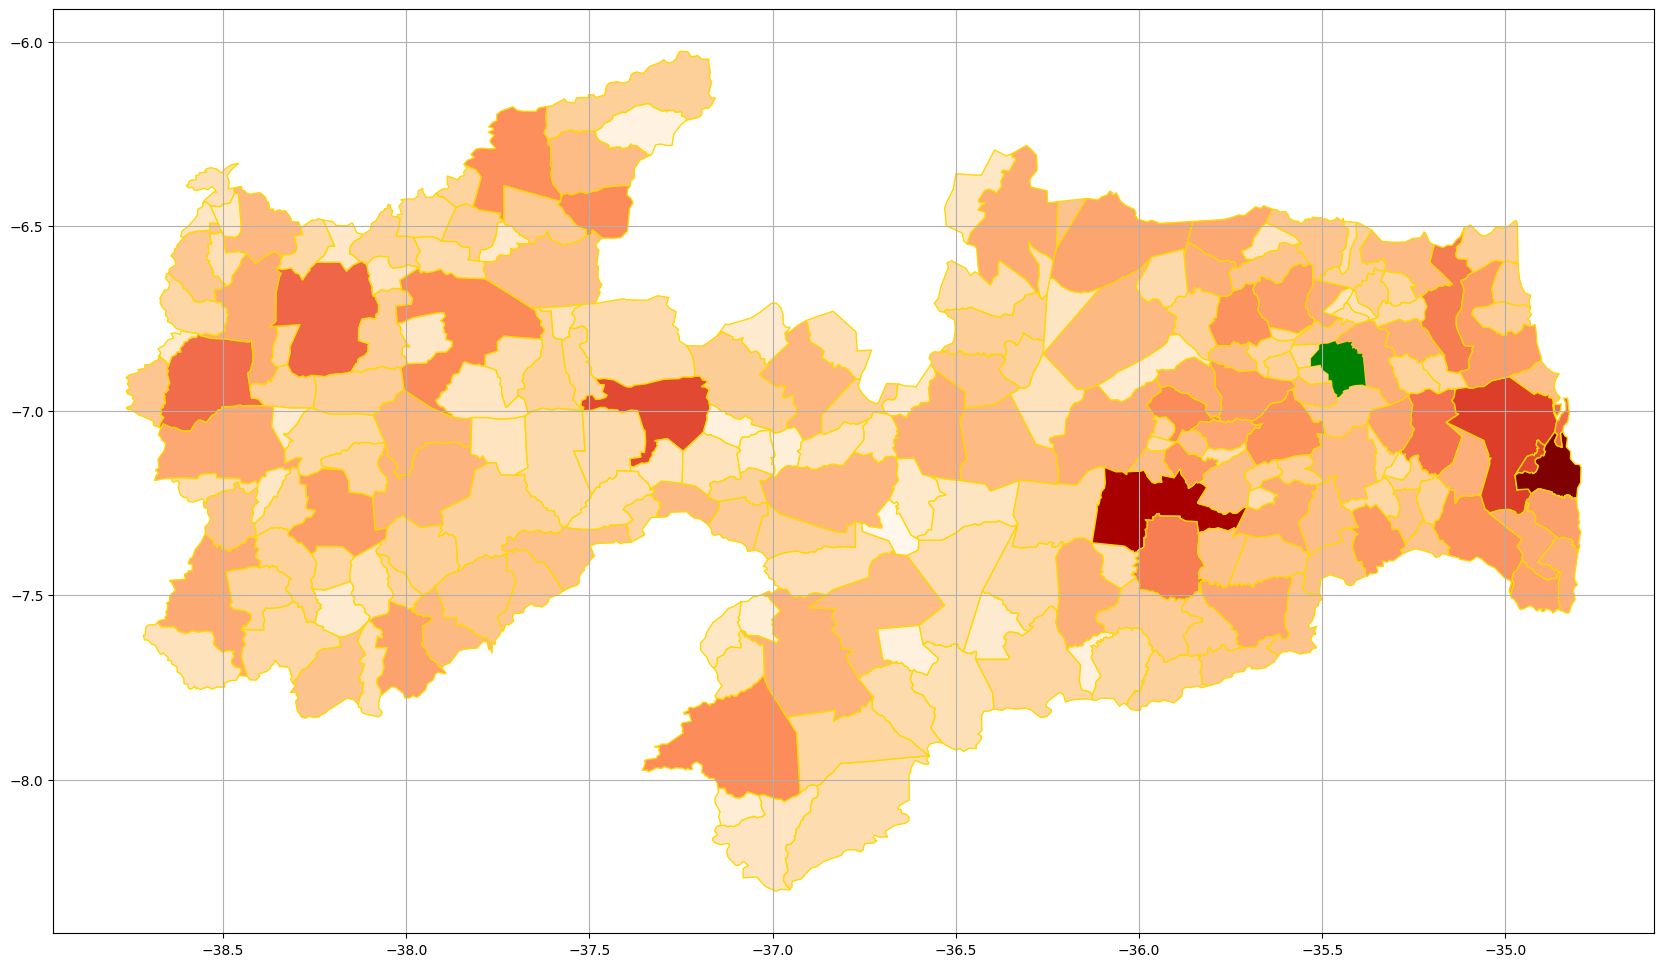

In [89]:
ax = resultado[resultado.UF == 'PB'].plot(figsize=(23, 12), cmap='OrRd', column='POP', edgecolor='gold')
resultado[resultado.NOME == 'Guarabira'].plot(color='green', ax=ax)
plt.grid(True)
plt.show()

In [13]:
shape_file[shape_file.GEOCODIGO == 2506301]

,GEOCODIGO,NOME,UF,ID_UF,REGIAO,MESOREGIAO,MICROREGIA,LATITUDE,LONGITUDE,geometry
5690,2506301,Guarabira,PB,25,Nordeste,AGRESTE PARAIBANO,GUARABIRA,-6.855,-35.49,"POLYGON ((-35.53059 -6.87997, -35.53059 -6.858..."


In [62]:
mun_data = pd.read_csv('municipios_br/muni.csv')

In [63]:
mun_data.head()

,GEOCODIGO,Populacao_2010,Porte,Capital
0,1100015,24392.0,Pequeno II,NaN
1,1100023,90353.0,Médio,NaN
2,1100031,6313.0,Pequeno I,NaN
3,1100049,78574.0,Médio,NaN
4,1100056,17029.0,Pequeno I,NaN


In [50]:
shape_file.head()

,GEOCODIGO,NOME,UF,ID_UF,REGIAO,MESOREGIAO,MICROREGIA,LATITUDE,LONGITUDE,geometry
0,1200336,Mâncio Lima,AC,12,Norte,VALE DO JURUA,CRUZEIRO DO SUL,-7.614,-72.896,"POLYGON ((-73.80098 -7.11146, -73.73762 -7.134..."
1,1300201,Atalaia do Norte,AM,13,Norte,SUDOESTE AMAZONENSE,ALTO SOLIMOES,-4.372,-70.192,"POLYGON ((-73.80098 -7.11146, -73.79617 -7.102..."
2,1301654,Guajará,AM,13,Norte,SUDOESTE AMAZONENSE,JURUA,-7.546,-72.584,"POLYGON ((-73.73762 -7.13432, -73.70822 -7.040..."
3,1200427,Rodrigues Alves,AC,12,Norte,VALE DO JURUA,CRUZEIRO DO SUL,-7.742,-72.647,"POLYGON ((-73.69158 -7.76778, -73.67485 -7.740..."
4,1200203,Cruzeiro do Sul,AC,12,Norte,VALE DO JURUA,CRUZEIRO DO SUL,-7.631,-72.67,"POLYGON ((-73.62958 -8.05086, -73.42396 -8.032..."


In [66]:
resultado = pd.merge(shape_file, mun_data, on='GEOCODIGO')

In [64]:
len(shape_file)

5807

In [65]:
len(mun_data)

5570

In [67]:
len(resultado)

5807

In [73]:
resultado.head(10)

,GEOCODIGO,NOME,UF,ID_UF,REGIAO,MESOREGIAO,MICROREGIA,LATITUDE,LONGITUDE,geometry,Populacao_2010,Porte,Capital
0,1200336,Mâncio Lima,AC,12,Norte,VALE DO JURUA,CRUZEIRO DO SUL,-7.614,-72.896,"POLYGON ((-73.80098 -7.11146, -73.73762 -7.134...",15206.0,Pequeno I,NaN
1,1300201,Atalaia do Norte,AM,13,Norte,SUDOESTE AMAZONENSE,ALTO SOLIMOES,-4.372,-70.192,"POLYGON ((-73.80098 -7.11146, -73.79617 -7.102...",15153.0,Pequeno I,NaN
2,1301654,Guajará,AM,13,Norte,SUDOESTE AMAZONENSE,JURUA,-7.546,-72.584,"POLYGON ((-73.73762 -7.13432, -73.70822 -7.040...",13974.0,Pequeno I,NaN
3,1200427,Rodrigues Alves,AC,12,Norte,VALE DO JURUA,CRUZEIRO DO SUL,-7.742,-72.647,"POLYGON ((-73.69158 -7.76778, -73.67485 -7.740...",14389.0,Pequeno I,NaN
4,1200203,Cruzeiro do Sul,AC,12,Norte,VALE DO JURUA,CRUZEIRO DO SUL,-7.631,-72.67,"POLYGON ((-73.62958 -8.05086, -73.42396 -8.032...",78507.0,Médio,NaN
5,1200393,Porto Walter,AC,12,Norte,VALE DO JURUA,CRUZEIRO DO SUL,-8.269,-72.744,"POLYGON ((-73.33067 -8.47423, -73.24035 -8.403...",9176.0,Pequeno I,NaN
6,1200351,Marechal Thaumaturgo,AC,12,Norte,VALE DO JURUA,CRUZEIRO DO SUL,-8.941,-72.792,"POLYGON ((-73.15898 -9.35248, -73.15073 -9.336...",14227.0,Pequeno I,NaN
7,1200328,Jordão,AC,12,Norte,VALE DO JURUA,TARAUACA,-9.434,-71.884,"POLYGON ((-72.37123 -9.50888, -72.29933 -9.504...",6577.0,Pequeno I,NaN
8,1200609,Tarauacá,AC,12,Norte,VALE DO JURUA,TARAUACA,-8.161,-70.766,"POLYGON ((-71.95781 -7.62487, -71.38111 -7.691...",35590.0,Pequeno II,NaN
9,1301803,Ipixuna,AM,13,Norte,SUDOESTE AMAZONENSE,JURUA,-7.051,-71.695,"POLYGON ((-72.05064 -7.10243, -72.04133 -7.098...",22254.0,Pequeno II,NaN


In [71]:
resultado['Populacao_2010'].isnull().sum()

0

In [74]:
len(shape_file['GEOCODIGO'])

5807

In [80]:
resultado['POP'] = np.log(resultado['Populacao_2010'])

In [81]:
resultado['POP']

0        9.629445
1        9.625954
2        9.544954
3        9.574219
4       11.270943
          ...    
5802    10.967232
5803    10.967232
5804     7.874739
5805    11.549286
5806    10.378448
Name: POP, Length: 5807, dtype: float64